##  Analyzing the Impact of Weather Conditions on Insurance Claims in Germany

## Introduction

Weather significantly affects our daily lives and has a notable impact on various aspects, including insurance claims. Germany's diverse climate provides an intriguing topic for exploring how weather conditions relate to insurance claims. This study aims to analyze this relationship, investigating how different weather patterns might influence the frequency and severity of insurance claims in Germany. Understanding these connections could offer valuable insights for insurers and policymakers in managing risks associated with weather-related claims in the country.


## Methods
### Data Sources
In this study, two open-source datasets have been utilized. The first dataset is sourced from the German Weather Service (Deutscher Wetterdienst - [DWD](https://opendata.dwd.de/)), which offers comprehensive weather-related data covering Germany and its individual states. The second dataset originates from [GENESIS](https://www-genesis.destatis.de/genesis/online/data?operation=sprachwechsel&language=en), providing detailed information on insurance claims across various categories within Germany.

### Datasource 1: Weather Datasource
* Source: [DWD](https://opendata.dwd.de/)
* Metadata URL: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/
* Data URL: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_01.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_02.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_03.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_04.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_05.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_06.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_07.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_08.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_09.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_10.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_11.txt
            https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/monthly/air_temperature_mean/regional_averages_tm_12.txt
* Data Type: CSV
* License Type: OpenData License

### Datasource 2: Insurance claims Datasource
* Source: [GENESIS](https://www-genesis.destatis.de/genesis/online/data?operation=sprachwechsel&language=en)
* Metadata URL: https://www-genesis.destatis.de/genesis//online?operation=table&code=52411-0020&bypass=true&levelindex=0&levelid=1699387440984#abreadcrumb
* Data URL: https://www-genesis.destatis.de/genesisWS/rest/2020/data/tablefile?username=MY_USERNAME&password=MY_PASSWORD&name=52411-0020&area=all&compress=false&transpose=false&startyear=2018&endyear=2022&language=en
* Data Type: CSV
* License Type: OpenData License



### Install Dependencies
First of all, we need to install necessary dependencies to run the project.

In [589]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Packages
The second step is to import required packages.

In [590]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Run Automated Data Pipeline
In this step, we will run the automated data pipeline to download the datasets from the datasources that are disscussed above. After running the pipeline, it will create a sqlite database named **"fau_made_project_ws23.sqlite"** in the *project/data* directory.

### Load Data
In this step, we will load the datasets from the sqlite database and store them into two pandas dataframes.

In [591]:
conn = sqlite3.connect("data/fau_made_project_ws23.sqlite")
weather_data_df = pd.read_sql_query(f"SELECT * FROM weather_data", conn)
insurance_claim_df = pd.read_sql_query(f"SELECT * FROM insurance_claim_data", conn)
conn.close()

### Explore the Datasets
This section will focus on exploring the two datasets further in details.

#### Weather Dataset
The weather dataset consist of average monthly temperature of Germany and all of its states from 2010 to 2022. In this study, we will only consider the average temperature of Germany.

In [592]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          156 non-null    int64  
 1   Month                         156 non-null    object 
 2   Date                          156 non-null    object 
 3   Brandenburg/Berlin            156 non-null    float64
 4   Brandenburg                   156 non-null    float64
 5   Baden-Wuerttemberg            156 non-null    float64
 6   Bayern                        156 non-null    float64
 7   Hessen                        156 non-null    float64
 8   Mecklenburg-Vorpommern        156 non-null    float64
 9   Niedersachsen                 156 non-null    float64
 10  Niedersachsen/Hamburg/Bremen  156 non-null    float64
 11  Nordrhein-Westfalen           156 non-null    float64
 12  Rheinland-Pfalz               156 non-null    float64
 13  Schle

In [593]:
weather_data_df

,Year,Month,Date,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Germany
0,2010,January,January-2010,-5.14,-5.15,-2.76,-3.77,-3.36,-4.64,-3.20,-3.20,-2.06,-2.48,-3.32,-1.96,-5.09,-4.78,-4.81,-4.85,-3.65
1,2010,February,February-2010,-0.61,-0.63,0.13,-1.12,-0.23,-1.03,-0.48,-0.48,0.65,0.65,-1.05,1.25,-0.98,-0.78,-1.00,-1.27,-0.50
2,2010,March,March-2010,4.57,4.56,3.81,3.28,4.34,3.96,4.86,4.87,5.07,4.68,4.25,4.96,3.80,4.69,4.25,3.69,4.20
3,2010,April,April-2010,8.95,8.93,8.79,8.21,8.97,8.01,8.98,8.98,9.29,9.46,8.08,9.89,8.30,8.95,8.60,8.16,8.69
4,2010,May,May-2010,11.13,11.12,10.65,10.69,10.32,9.96,10.09,10.09,10.17,10.58,9.57,10.97,10.66,10.65,10.34,9.95,10.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022,August,August-2022,20.92,20.90,20.26,19.57,20.84,20.02,20.14,20.14,20.62,21.39,19.30,21.75,19.84,20.62,20.27,19.81,20.23
152,2022,September,September-2022,13.56,13.55,13.29,12.56,13.39,13.43,13.80,13.80,14.16,13.77,13.55,13.98,12.94,13.75,13.34,12.80,13.37
153,2022,October,October-2022,12.52,12.51,12.92,11.92,12.15,12.40,12.78,12.79,13.03,12.85,12.60,13.22,12.41,12.87,12.52,12.05,12.52
154,2022,November,November-2022,5.66,5.65,6.37,5.31,6.72,6.21,7.05,7.05,8.05,7.41,6.96,7.62,5.40,6.04,5.88,5.67,6.35


#### Insurance Claims Dataset
The insurance claims dataset is consist of total monthly insurance claims in 4 different categories of Germany from 2010 to 2022. These categories are:
* WZ08-G - Wholesale, retail trade, repair of motor vehicles
* WZ08-H - Transportation and storage
* WZ08-I - Accommodation and food service activities
* WZ08-Q - Human health and social work activities

In [594]:
insurance_claim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           624 non-null    int64 
 1   Month          624 non-null    object
 2   Date           624 non-null    object
 3   Category_Type  624 non-null    object
 4   Category_Name  624 non-null    object
 5   Total_Claim    624 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 29.4+ KB


In [595]:
insurance_claim_df

,Year,Month,Date,Category_Type,Category_Name,Total_Claim
0,2010,January,January-2010,WZ08-G,"Wholesale, retail trade, repair of motor vehicles",496065
1,2010,January,January-2010,WZ08-H,Transportation and storage,89613
2,2010,January,January-2010,WZ08-I,Accommodation and food service activities,33444
3,2010,January,January-2010,WZ08-Q,Human health and social work activities,14137
4,2010,February,February-2010,WZ08-G,"Wholesale, retail trade, repair of motor vehicles",390388
...,...,...,...,...,...,...
619,2022,November,November-2022,WZ08-Q,Human health and social work activities,6892
620,2022,December,December-2022,WZ08-G,"Wholesale, retail trade, repair of motor vehicles",230722
621,2022,December,December-2022,WZ08-H,Transportation and storage,22437
622,2022,December,December-2022,WZ08-I,Accommodation and food service activities,21600


### Narrow Down the Timeframe
In this study, we aim to analyze the correlation between the weather conditions and the insurance claims in Germany within the time frame spanning from 2020 to 2022.


In [596]:
start_year = 2020
end_year = 2022
weather_data_df = weather_data_df.loc[(weather_data_df['Year'] >= start_year) & (weather_data_df['Year'] <= end_year)]
insurance_claim_df= insurance_claim_df.loc[(insurance_claim_df['Year'] >= start_year) & (insurance_claim_df['Year'] <= end_year)]


### Plot the bar graph of average temperature over time

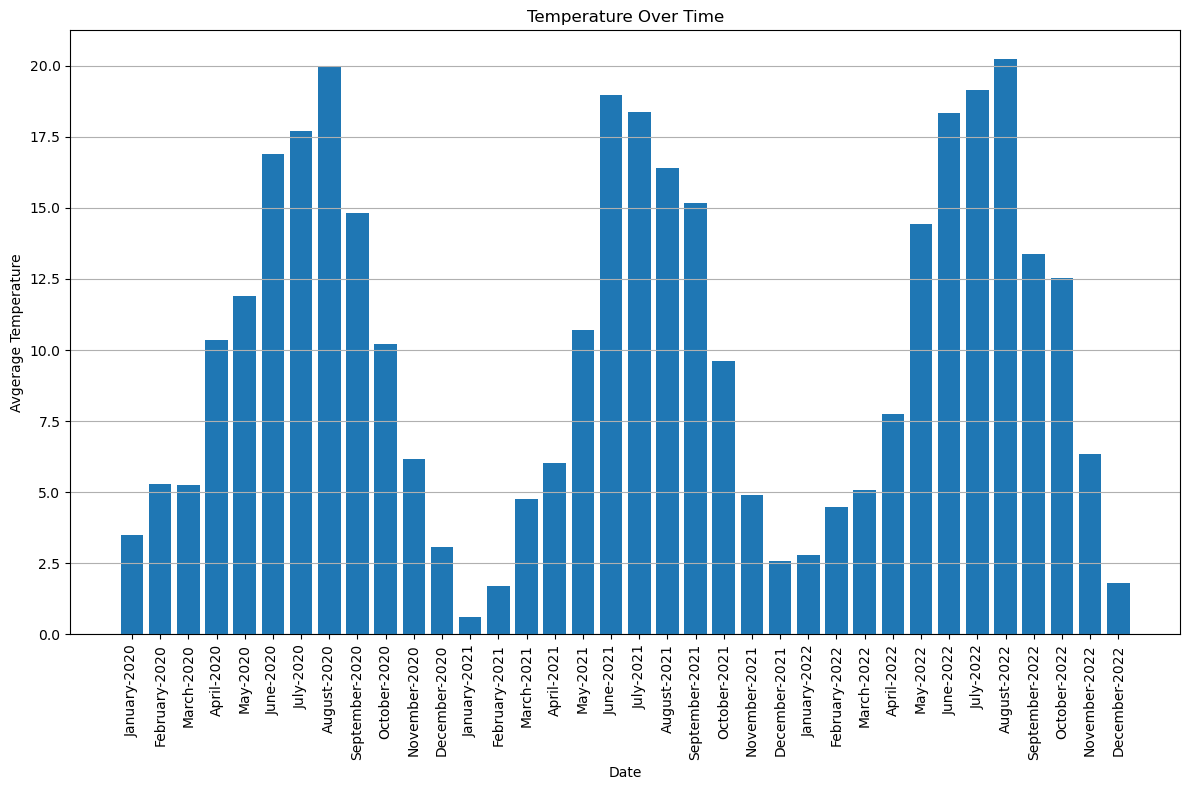

In [597]:
# Plot the behavior of avg temperature over time
plt.figure(figsize=(12, 8))
plt.bar(weather_data_df['Date'], weather_data_df['Germany'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avgerage Temperature')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

### Plot the Bar Graph of Insurance Claims by Respective Category

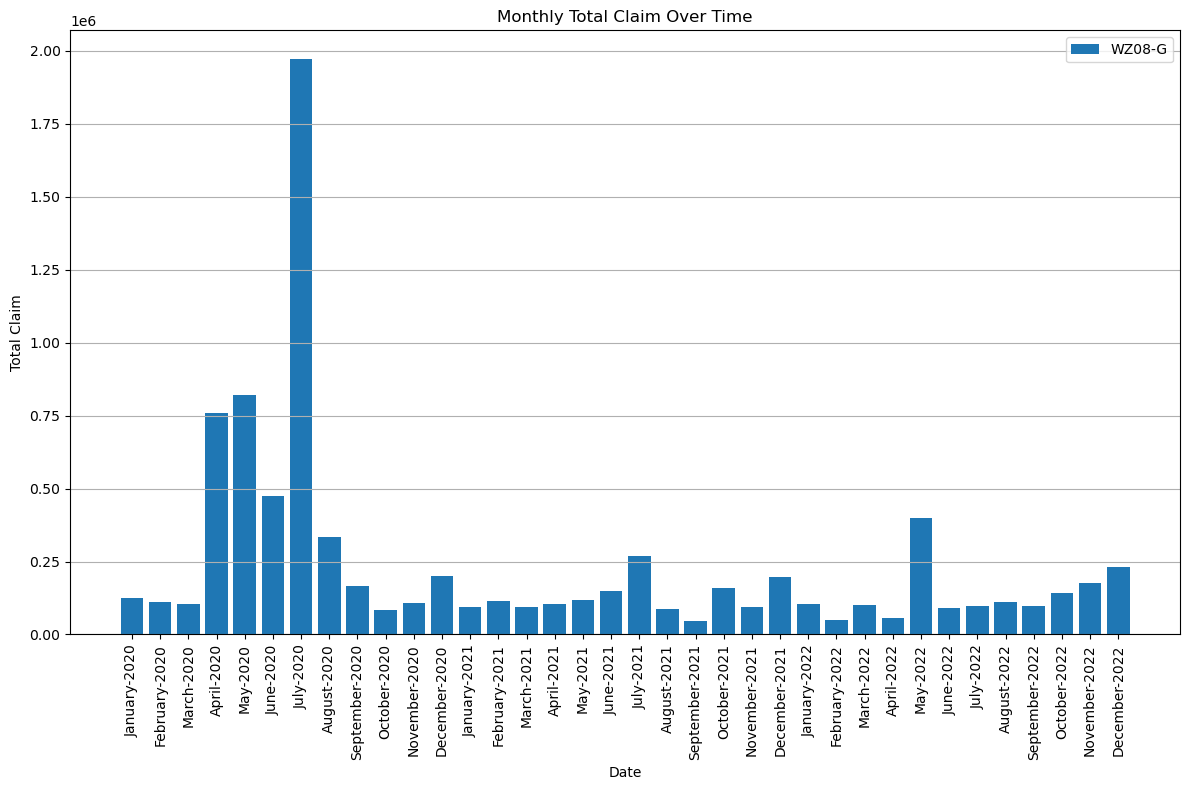

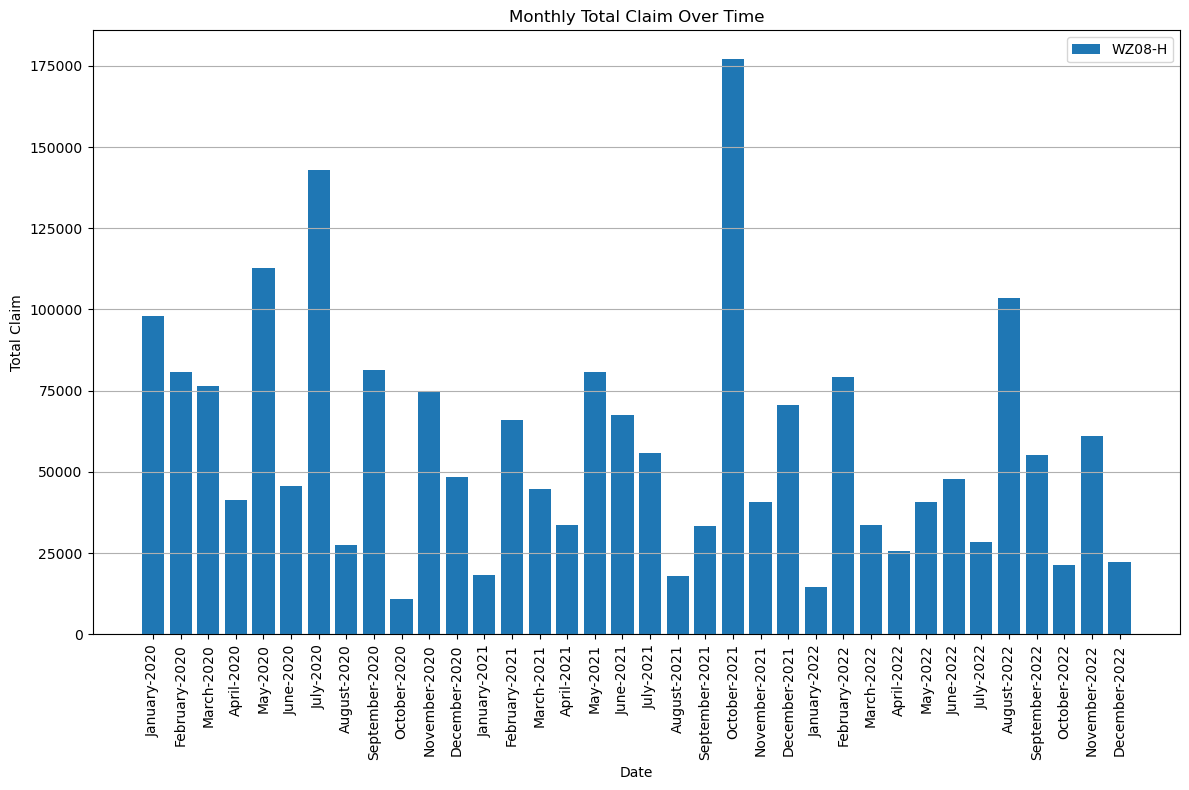

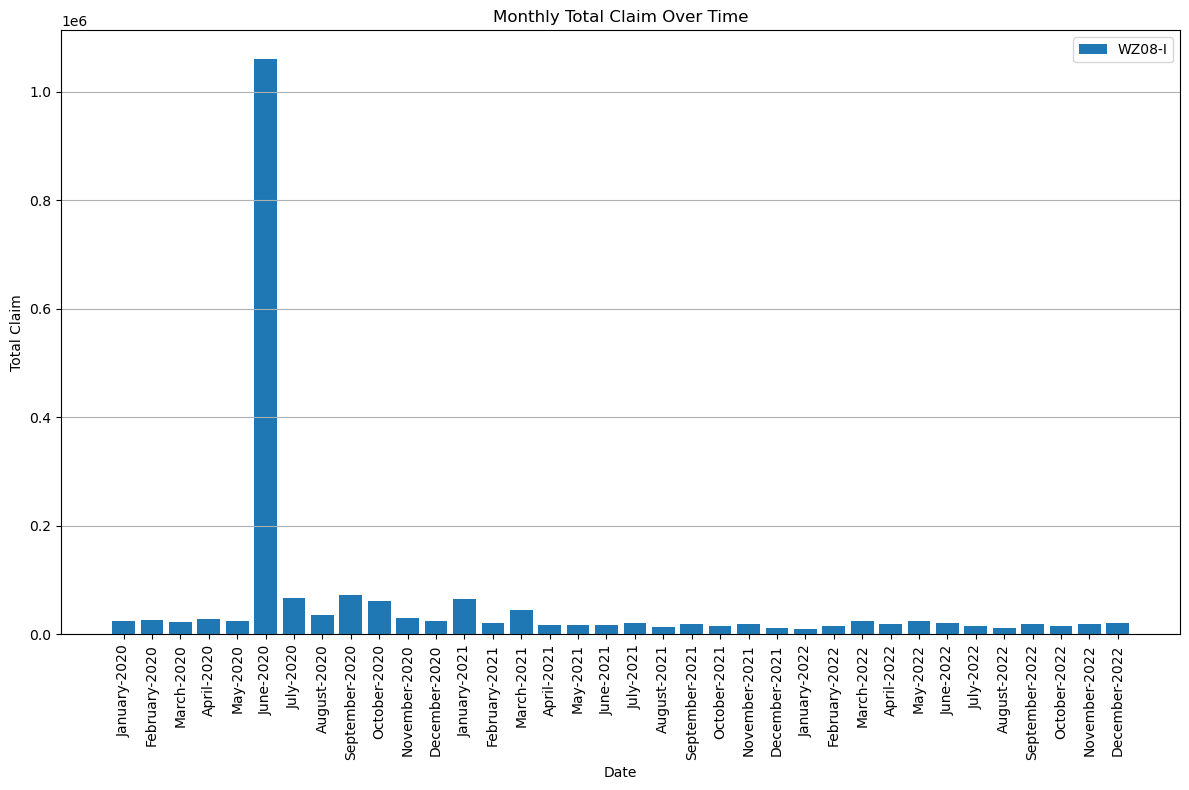

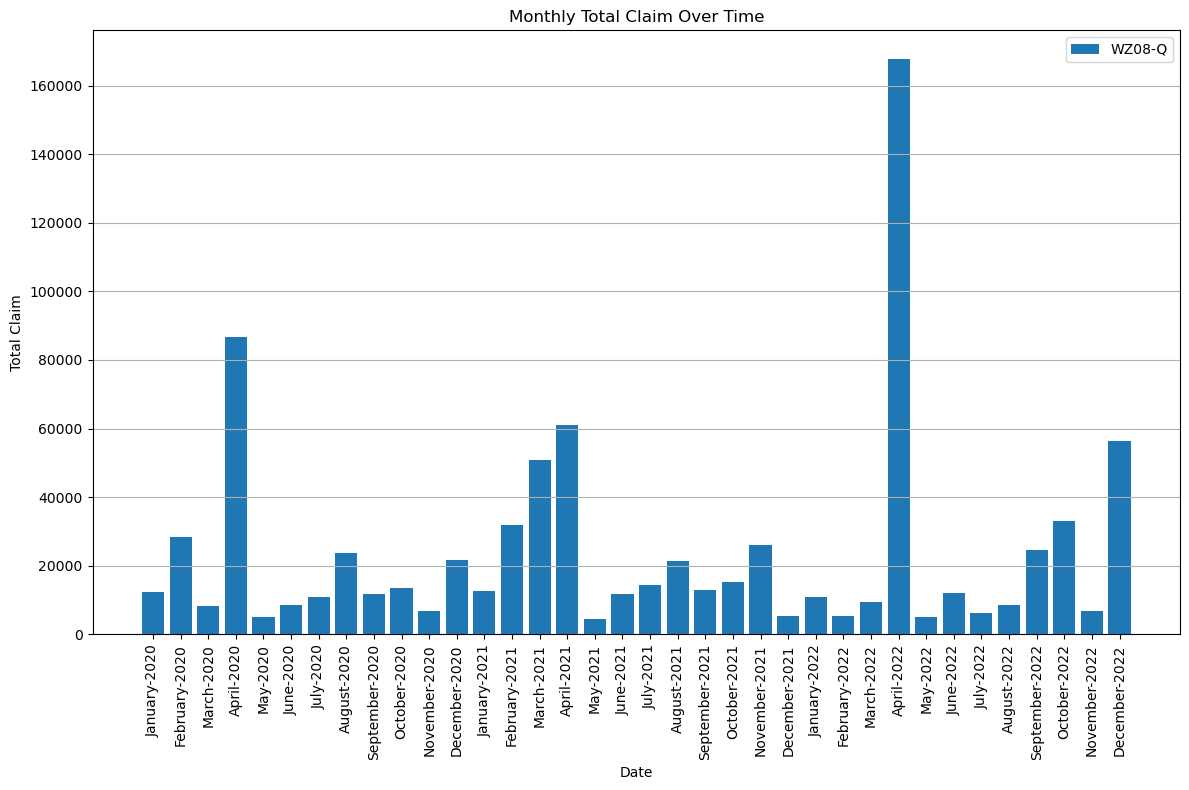

In [608]:
# Group data by 'Category_Type' and plot bar graphs for each category
categories = insurance_claim_df['Category_Type'].unique()

  
for category in categories:
    category_data =insurance_claim_df[insurance_claim_df['Category_Type'] == category]
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed 
    plt.bar(category_data['Date'], category_data['Total_Claim'], label=category)
    plt.xlabel('Date')
    plt.ylabel('Total Claim')
    plt.title(f'Monthly Total Claim Over Time')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### Plot the Combined Line Graph of Insurance Claims

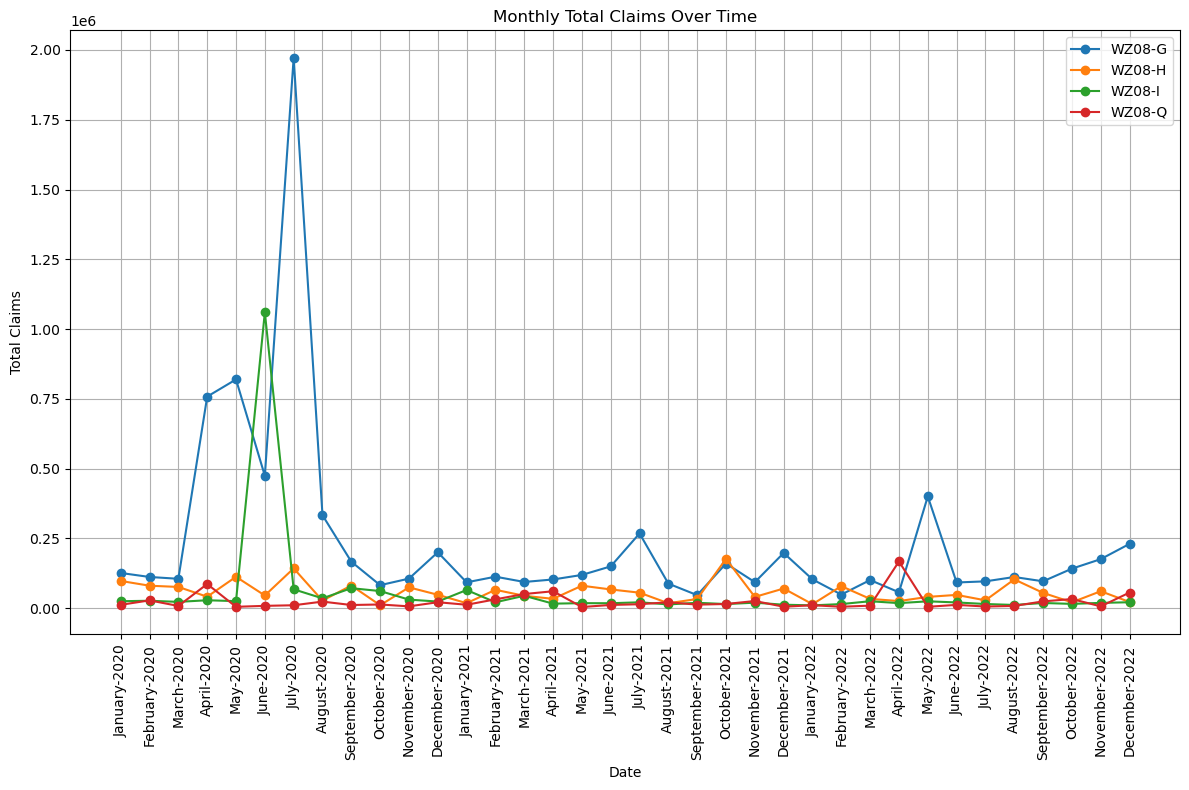

In [609]:
# Group data by 'Category_Type' and plot line graphs for each category
categories = insurance_claim_df['Category_Type'].unique()

  
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed 
for category in categories:
        category_data =insurance_claim_df[insurance_claim_df['Category_Type'] == category]
        plt.plot(category_data['Date'], category_data['Total_Claim'], marker= 'o', label=category)

plt.xlabel('Date')
plt.ylabel('Total Claims')
plt.title(f'Monthly Total Claims Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Calculate the Mean of Insurance Claim
We will compute the mean of total insurance claims of the 4 categories.

In [600]:
# Convert 'Date' column to datetime format
insurance_claim_df['Date'] = pd.to_datetime(insurance_claim_df['Date'], format='%B-%Y')

# Group data by 'Date' and calculate the mean of 'Total_Claim'
mean_insurance_claim_df = insurance_claim_df.groupby('Date')['Total_Claim'].mean().reset_index()

# Change the Date format
mean_insurance_claim_df['Date'] = mean_insurance_claim_df['Date'].dt.strftime('%B-%Y')
insurance_claim_df['Date'] = insurance_claim_df['Date'].dt.strftime('%B-%Y')

mean_insurance_claim_df

/var/folders/cx/jk7s9d_n4277x__kx36mf_hm0000gn/T/ipykernel_3704/1740044003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_claim_df['Date'] = pd.to_datetime(insurance_claim_df['Date'], format='%B-%Y')
/var/folders/cx/jk7s9d_n4277x__kx36mf_hm0000gn/T/ipykernel_3704/1740044003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_claim_df['Date'] = insurance_claim_df['Date'].dt.strftime('%B-%Y')


,Date,Total_Claim
0,January-2020,65471.00
1,February-2020,62031.75
2,March-2020,53296.75
3,April-2020,228792.50
4,May-2020,240807.00
5,June-2020,397385.25
6,July-2020,548389.25
7,August-2020,105037.75
8,September-2020,82995.50
9,October-2020,42206.75


### Merge the Dataframes


In [601]:
merged_df = pd.merge(weather_data_df, mean_insurance_claim_df, on='Date')

# Drop columns by index positions
columns_to_drop = range(3,19)
final_df= merged_df.drop(merged_df.columns[columns_to_drop], axis=1)

#rename the column name
final_df = final_df.rename(columns={'Germany': 'Germany_Avg_Temp', 'Total_Claim': 'Mean_Total_Claim'})

final_df

,Year,Month,Date,Germany_Avg_Temp,Mean_Total_Claim
0,2020,January,January-2020,3.48,65471.00
1,2020,February,February-2020,5.29,62031.75
2,2020,March,March-2020,5.27,53296.75
3,2020,April,April-2020,10.35,228792.50
4,2020,May,May-2020,11.91,240807.00
5,2020,June,June-2020,16.89,397385.25
6,2020,July,July-2020,17.69,548389.25
7,2020,August,August-2020,19.95,105037.75
8,2020,September,September-2020,14.82,82995.50
9,2020,October,October-2020,10.21,42206.75


### Normalization
Normalization is a statistical process used to standardize the values of features in a dataset. It transforms the numeric values of different variables to a common scale, typically between 0 and 1, or within a specific range, without distorting differences in the ranges of values.

The objective of normalization is to bring all variables or features to a similar scale to ensure fair comparisons and avoid the dominance of variables with larger scales over those with smaller scales during analysis or modeling. This process doesn't change the shape of the distribution of the data but instead adjusts the values to a standardized scale, making it easier to interpret and compare the variables.

In [602]:

# Normalize the 'Total_Claim' and the average temperature
final_df['Normalized_Mean_Total_Claim'] = (final_df['Mean_Total_Claim'] - final_df['Mean_Total_Claim'].min()) / (final_df['Mean_Total_Claim'].max() - final_df['Mean_Total_Claim'].min())
final_df['Normalized_Avg_Temp'] = (final_df['Germany_Avg_Temp'] - final_df['Germany_Avg_Temp'].min()) / (final_df['Germany_Avg_Temp'].max() - final_df['Germany_Avg_Temp'].min())
final_df


,Year,Month,Date,Germany_Avg_Temp,Mean_Total_Claim,Normalized_Mean_Total_Claim,Normalized_Avg_Temp
0,2020,January,January-2020,3.48,65471.00,0.071572,0.145408
1,2020,February,February-2020,5.29,62031.75,0.064960,0.237755
2,2020,March,March-2020,5.27,53296.75,0.048167,0.236735
3,2020,April,April-2020,10.35,228792.50,0.385564,0.495918
4,2020,May,May-2020,11.91,240807.00,0.408662,0.575510
5,2020,June,June-2020,16.89,397385.25,0.709689,0.829592
6,2020,July,July-2020,17.69,548389.25,1.000000,0.870408
7,2020,August,August-2020,19.95,105037.75,0.147641,0.985714
8,2020,September,September-2020,14.82,82995.50,0.105264,0.723980
9,2020,October,October-2020,10.21,42206.75,0.026846,0.488776


### Plot the behavior of average temperature over time

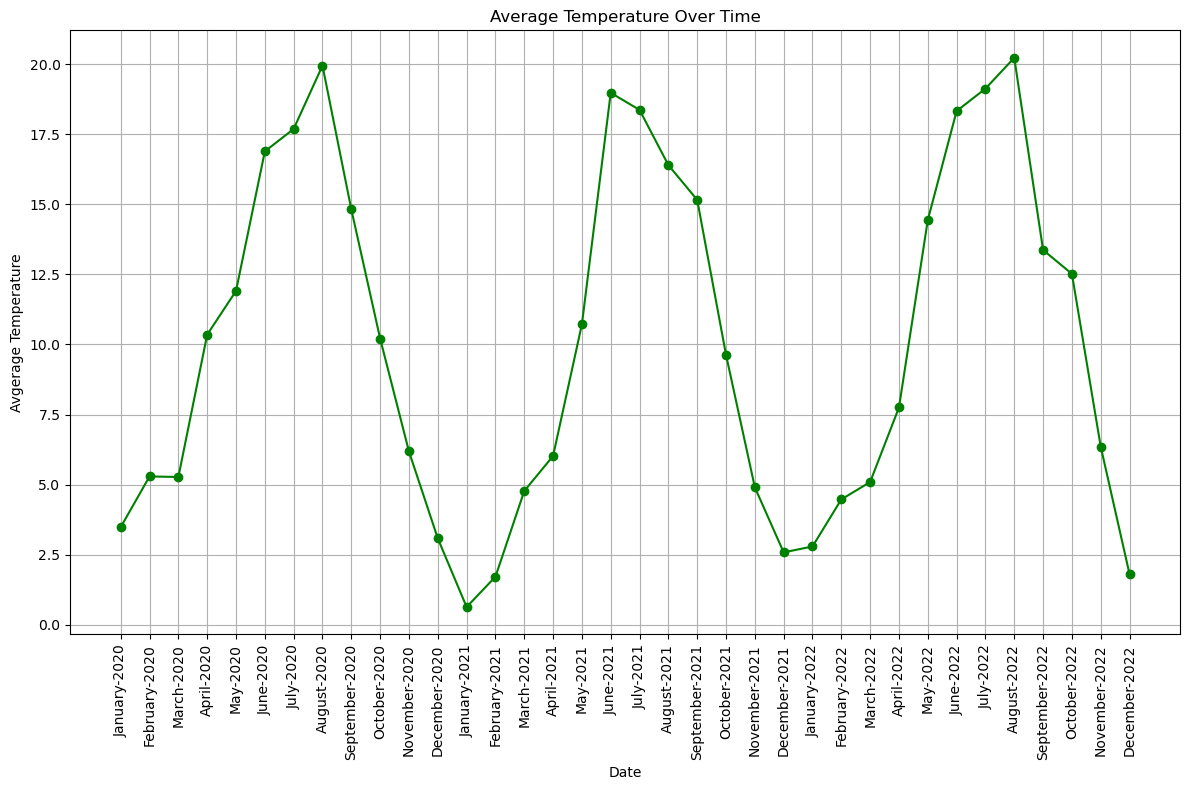

In [603]:
# Plot the behavior of temperature over time
plt.figure(figsize=(12, 8))
plt.plot(final_df['Date'], final_df['Germany_Avg_Temp'], marker='o', linestyle='-', color='g')

plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avgerage Temperature')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Plot the Behavior of Normalized Average Temperature Over Time

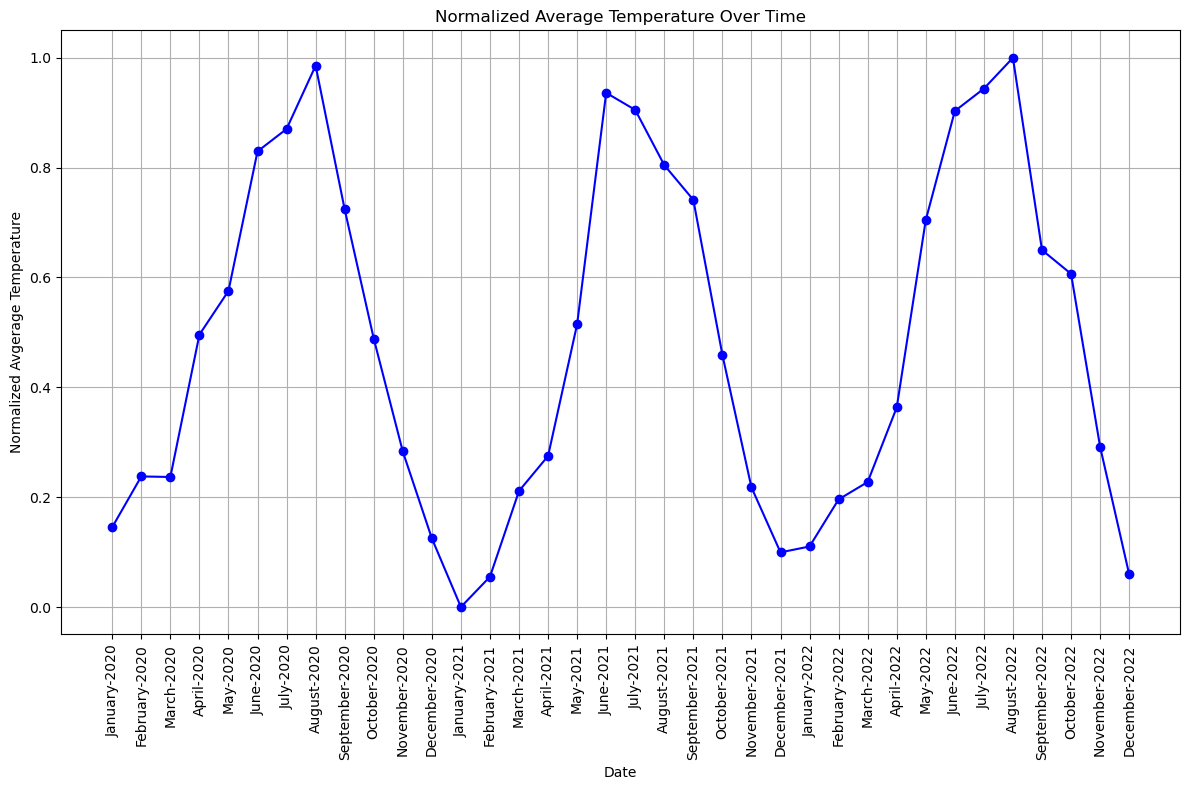

In [604]:
# Plot the behavior of normalized temperature over time
plt.figure(figsize=(12, 8))
plt.plot(final_df['Date'], final_df['Normalized_Avg_Temp'], marker='o', linestyle='-', color='b')

plt.title('Normalized Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Avgerage Temperature')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Plot the Mean Total Claim Over Time

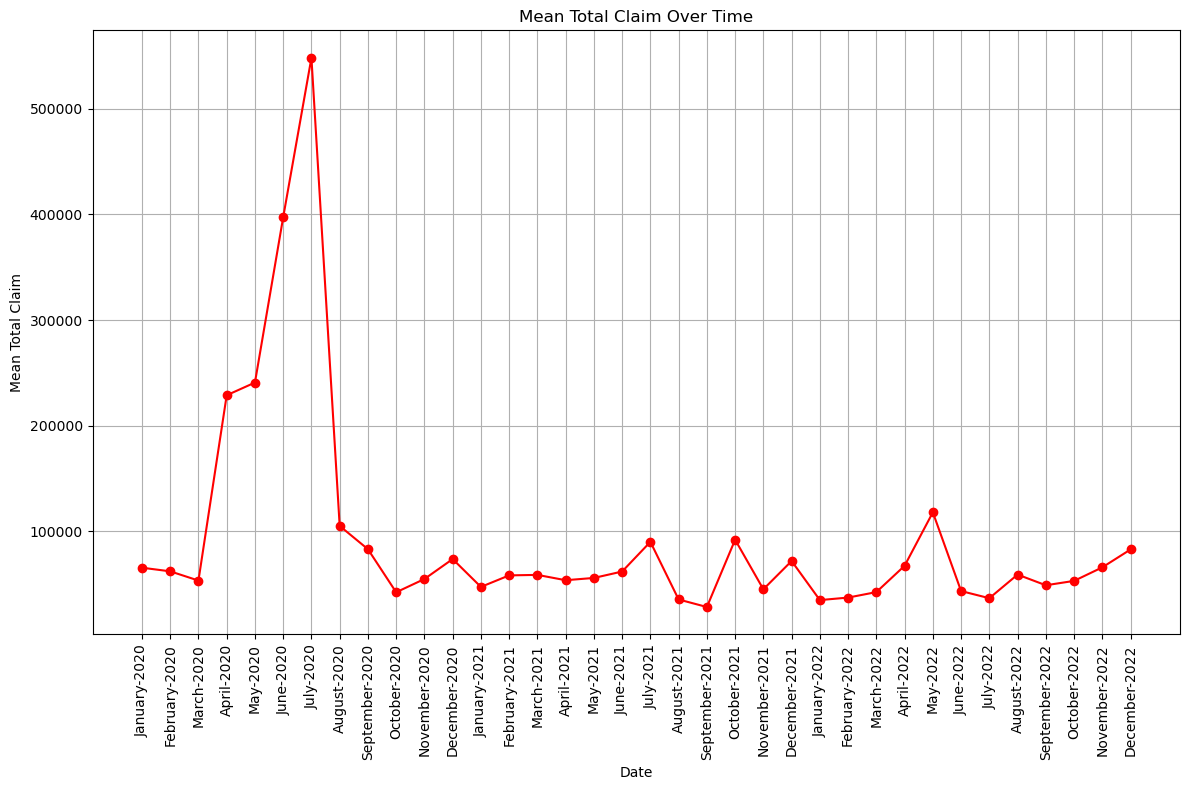

In [605]:
# Plot the behavior of temperature over time
plt.figure(figsize=(12, 8))
plt.plot(final_df['Date'], final_df['Mean_Total_Claim'], marker='o', linestyle='-', color='r')
plt.title('Mean Total Claim Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Total Claim')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Plot the Normalized Mean Claim Over Time

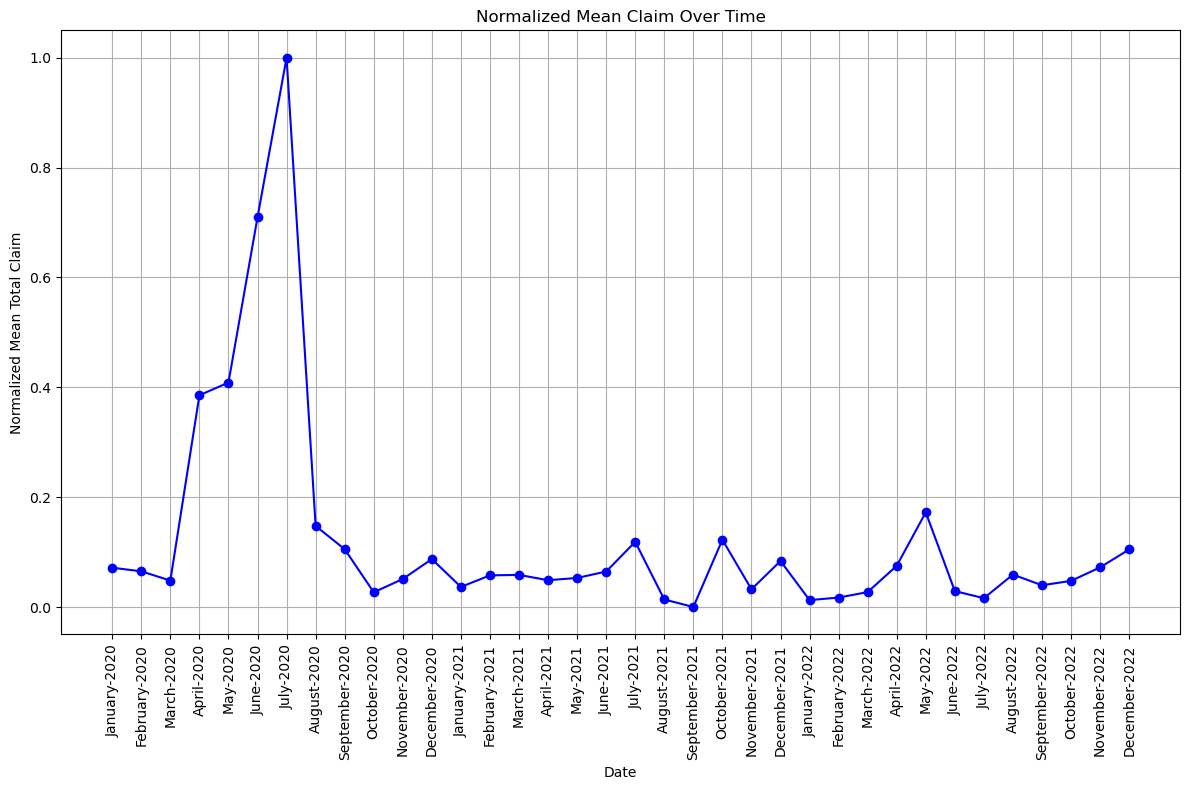

In [606]:
# Plot the behavior of claim over time
plt.figure(figsize=(12, 8))
plt.plot(final_df['Date'], final_df['Normalized_Mean_Total_Claim'], marker='o', linestyle='-', color='b')
plt.title('Normalized Mean Claim Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Mean Total Claim')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Plot the Average Temperature and Total Claim Over Time

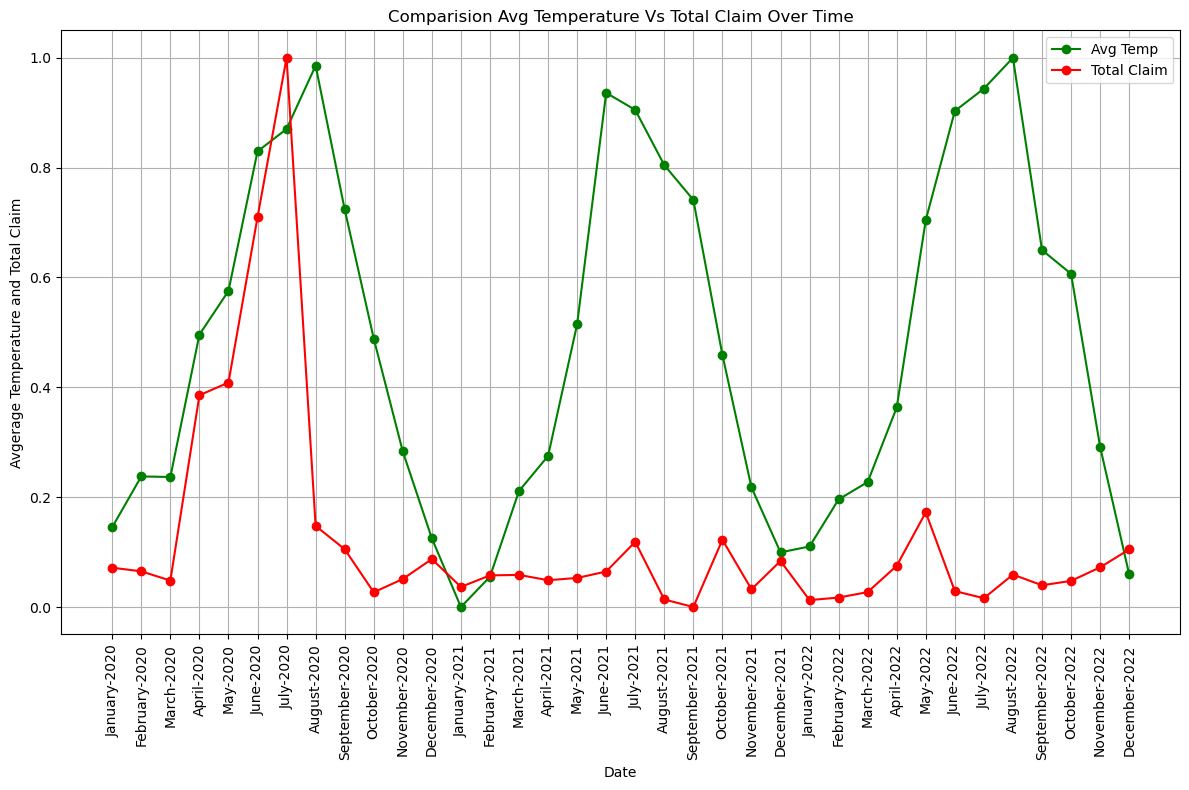

In [607]:
# Comparision
plt.figure(figsize=(12, 8))
plot1, = plt.plot(final_df['Date'], final_df['Normalized_Avg_Temp'], marker='o', linestyle='-', color='g')
plot2, = plt.plot(final_df['Date'], final_df['Normalized_Mean_Total_Claim'], marker='o', linestyle='-', color='r')

plt.title('Comparision Avg Temperature Vs Total Claim Over Time')
plt.xlabel('Date')
plt.ylabel('Avgerage Temperature and Total Claim')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend([plot1, plot2], ["Avg Temp", "Total Claim"])
plt.tight_layout()

# Show the plot
plt.show()

## Result
In the analysis spanning from 2020 to 2022, the examination of the relationship between average temperature and insurance claims in Germany reveals a lack of significant correlation. Across this timeframe, despite sporadic resemblances noted particularly from January 2020 to January 2021, these observed similarities were deemed negligible and inconsequential.

This lack of a discernible connection suggests that, within the specified timeframe and geographical context, changes or variations in the average temperature did not exhibit a significant impact or influence on the intensity of insurance claims made in Germany.

## Discussion
The absence of a substantial correlation between average temperature and insurance claim frequency or magnitude within Germany, as observed from the analysis covering the period between 2020 and 2022, prompts several noteworthy considerations and potential implications.

**Non-Linear Relationships:** It's plausible that the relationship between temperature and insurance claims might be more complex or nonlinear than initially assumed. The absence of a linear correlation within this timeframe suggests that the impact of temperature on insurance claims, if any, could be contingent on various other interacting factors or thresholds.

**Further Explorations:** This outcome highlights the need for a more nuanced investigation into the multifaceted dynamics between weather patterns, temporal changes, and insurance claim patterns. Subsequent studies might involve deeper analyses encompassing different seasons, specific geographic regions within Germany, or additional variables to unravel potential indirect effects or nonlinear associations.


**Data Limitations:** Lastly, the absence of a significant relationship could also stem from limitations within the dataset utilized for the analysis. There might be missing variables, insufficient granularity, or constraints in capturing nuanced aspects that influence the relationship between temperature and insurance claims.

In conclusion, while the analysis spanning 2020 to 2022 did not reveal a pronounced link between average temperature and insurance claim patterns in Germany, the outcome signifies the complexity of factors influencing insurance claims. This underscores the necessity for further in-depth investigations and a holistic understanding of the multifaceted nature of risk factors impacting insurance claim occurrences.